In [1]:
import pandas as pd
pd.set_option('max_column', None)
pd.set_option('display.float_format',lambda x:'%5f'%x)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
import streamlit as st

In [2]:
url = 'https://raw.githubusercontent.com/katenjoki/Telecom_Week1Challenge/main/OneDrive/Desktop/10Academy/Telecom_Week1Challenge/data/Week1_challenge_data_source(CSV).csv'
data = pd.read_csv(url)
data.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352.000000,4/4/2019 12:01,770.000000,4/25/2019 14:35,662.000000,1823652.000000,208201448079117.000000,33664962239.000000,35521209507511.000000,9.16456699548519E+015,42.000000,5.000000,23.000000,44.000000,NaN,NaN,100.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,NaN,NaN,37624.000000,38787.000000,1823652892.000000,Samsung,Samsung Galaxy A5 Sm-A520F,NaN,NaN,NaN,NaN,NaN,NaN,213.000000,214.000000,1545765.000000,24420.000000,1634479.000000,1271433.000000,3563542.000000,137762.000000,15854611.000000,2501332.000000,8198936.000000,9656251.000000,278082303.000000,14344150.000000,171744450.000000,8814393.000000,36749741.000000,308879636.000000
1,13114483482878900224.000000,4/9/2019 13:04,235.000000,4/25/2019 8:15,606.000000,1365104.000000,208201909211140.000000,33681854413.000000,35794009006359.000000,L77566A,65.000000,5.000000,16.000000,26.000000,NaN,NaN,100.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,NaN,NaN,168.000000,3560.000000,1365104371.000000,Samsung,Samsung Galaxy J5 (Sm-J530),NaN,NaN,NaN,NaN,NaN,NaN,971.000000,1022.000000,1926113.000000,7165.000000,3493924.000000,920172.000000,629046.000000,308339.000000,20247395.000000,19111729.000000,18338413.000000,17227132.000000,608750074.000000,1170709.000000,526904238.000000,15055145.000000,53800391.000000,653384965.000000
2,13114483484080500736.000000,4/9/2019 17:42,1.000000,4/25/2019 11:58,652.000000,1361762.000000,208200314458056.000000,33760627129.000000,35281510359387.000000,D42335A,NaN,NaN,6.000000,9.000000,NaN,NaN,100.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,1361762651.000000,Samsung,Samsung Galaxy A8 (2018),NaN,NaN,NaN,NaN,NaN,NaN,751.000000,695.000000,1684053.000000,42224.000000,8535055.000000,1694064.000000,2690151.000000,672973.000000,19725661.000000,14699576.000000,17587794.000000,6163408.000000,229584621.000000,395630.000000,410692588.000000,4215763.000000,27883638.000000,279807335.000000
3,13114483485442799616.000000,4/10/2019 0:31,486.000000,4/25/2019 7:36,171.000000,1321509.000000,208201402342131.000000,33750343200.000000,35356610164913.000000,T21824A,NaN,NaN,44.000000,44.000000,NaN,NaN,100.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,NaN,NaN,3330.000000,37882.000000,1321509685.000000,undefined,undefined,NaN,NaN,NaN,NaN,NaN,NaN,17.000000,207.000000,644121.000000,13372.000000,9023734.000000,2788027.000000,1439754.000000,631229.000000,21388122.000000,15146643.000000,13994646.000000,1097942.000000,799538153.000000,10849722.000000,749039933.000000,12797283.000000,43324218.000000,846028530.000000
4,13114483499480700928.000000,4/12/2019 20:10,565.000000,4/25/2019 10:40,954.000000,1089009.000000,208201401415120.000000,33699795932.000000,35407009745539.000000,D88865A,NaN,NaN,6.000000,9.000000,NaN,NaN,100.000000,

In [3]:
data.shape

(150001, 55)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

<h2>Task 1 : User Overview Analysis </h2>

<h3> Data Cleaning </h3>

In [5]:
data.columns = data.columns.str.replace(' ','_')
data.columns = data.columns.str.replace('/','_')
data.columns.to_list()

['Bearer_Id',
 'Start',
 'Start_ms',
 'End',
 'End_ms',
 'Dur._(ms)',
 'IMSI',
 'MSISDN_Number',
 'IMEI',
 'Last_Location_Name',
 'Avg_RTT_DL_(ms)',
 'Avg_RTT_UL_(ms)',
 'Avg_Bearer_TP_DL_(kbps)',
 'Avg_Bearer_TP_UL_(kbps)',
 'TCP_DL_Retrans._Vol_(Bytes)',
 'TCP_UL_Retrans._Vol_(Bytes)',
 'DL_TP_<_50_Kbps_(%)',
 '50_Kbps_<_DL_TP_<_250_Kbps_(%)',
 '250_Kbps_<_DL_TP_<_1_Mbps_(%)',
 'DL_TP_>_1_Mbps_(%)',
 'UL_TP_<_10_Kbps_(%)',
 '10_Kbps_<_UL_TP_<_50_Kbps_(%)',
 '50_Kbps_<_UL_TP_<_300_Kbps_(%)',
 'UL_TP_>_300_Kbps_(%)',
 'HTTP_DL_(Bytes)',
 'HTTP_UL_(Bytes)',
 'Activity_Duration_DL_(ms)',
 'Activity_Duration_UL_(ms)',
 'Dur._(ms).1',
 'Handset_Manufacturer',
 'Handset_Type',
 'Nb_of_sec_with_125000B_<_Vol_DL',
 'Nb_of_sec_with_1250B_<_Vol_UL_<_6250B',
 'Nb_of_sec_with_31250B_<_Vol_DL_<_125000B',
 'Nb_of_sec_with_37500B_<_Vol_UL',
 'Nb_of_sec_with_6250B_<_Vol_DL_<_31250B',
 'Nb_of_sec_with_6250B_<_Vol_UL_<_37500B',
 'Nb_of_sec_with_Vol_DL_<_6250B',
 'Nb_of_sec_with_Vol_UL_<_1250B',
 'Socia

In [6]:
data.dtypes

Bearer_Id                                   float64
Start                                        object
Start_ms                                    float64
End                                          object
End_ms                                      float64
Dur._(ms)                                   float64
IMSI                                        float64
MSISDN_Number                               float64
IMEI                                        float64
Last_Location_Name                           object
Avg_RTT_DL_(ms)                             float64
Avg_RTT_UL_(ms)                             float64
Avg_Bearer_TP_DL_(kbps)                     float64
Avg_Bearer_TP_UL_(kbps)                     float64
TCP_DL_Retrans._Vol_(Bytes)                 float64
TCP_UL_Retrans._Vol_(Bytes)                 float64
DL_TP_<_50_Kbps_(%)                         float64
50_Kbps_<_DL_TP_<_250_Kbps_(%)              float64
250_Kbps_<_DL_TP_<_1_Mbps_(%)               float64
DL_TP_>_1_Mb

In [7]:
#Convert dates to datetime
data['Start_ms']=pd.to_datetime(data['Start_ms'])
data['End_ms']=pd.to_datetime(data['End_ms'])

**Checking for null values**

In [8]:
#Check if there are rows where all column values are null
check_null = data.columns.isnull().any()
check_null

False

In [9]:
#% of null values
def null_analysis(df):
    total_values = np.product(df.shape)
    total_null = (df.isnull().sum()).sum()
    proportion_null = (total_null / total_values)*100
    
    print("The Telcommunication dataset has ",proportion_null,"% null values.")

null_analysis(data)

The Telcommunication dataset has  12.501637867868759 % null values.


**Finding columns that have more than 30% of null values**

In [10]:
def null_per_column(df):
    dataset = df.isnull().sum()
    dataset = pd.DataFrame(dataset,columns=['null'])
    dataset['%null'] = (dataset['null']/df.shape[0])*100
    dataframe = dataset[dataset['%null']>=30]
    print(dataframe)    
    #print('\n List of columns with more than 30% null values:\n',dataframe.index.to_list())

null_per_column(data)

2021-07-17 22:15:36.343 INFO    numexpr.utils: NumExpr defaulting to 4 threads.


                                            null     %null
TCP_DL_Retrans._Vol_(Bytes)                88146 58.763608
TCP_UL_Retrans._Vol_(Bytes)                96649 64.432237
HTTP_DL_(Bytes)                            81474 54.315638
HTTP_UL_(Bytes)                            81810 54.539636
Nb_of_sec_with_125000B_<_Vol_DL            97538 65.024900
Nb_of_sec_with_1250B_<_Vol_UL_<_6250B      92894 61.928920
Nb_of_sec_with_31250B_<_Vol_DL_<_125000B   93586 62.390251
Nb_of_sec_with_37500B_<_Vol_UL            130254 86.835421
Nb_of_sec_with_6250B_<_Vol_DL_<_31250B     88317 58.877607
Nb_of_sec_with_6250B_<_Vol_UL_<_37500B    111843 74.561503


In [11]:
#Dropping columns with more than 30% null values,apart from the TCP columns
data=data.drop(['HTTP_DL_(Bytes)', 'HTTP_UL_(Bytes)', 'Nb_of_sec_with_125000B_<_Vol_DL', 'Nb_of_sec_with_1250B_<_Vol_UL_<_6250B', 'Nb_of_sec_with_31250B_<_Vol_DL_<_125000B', 'Nb_of_sec_with_37500B_<_Vol_UL', 'Nb_of_sec_with_6250B_<_Vol_DL_<_31250B', 'Nb_of_sec_with_6250B_<_Vol_UL_<_37500B'],axis=1)
data.shape

(150001, 47)

In [12]:
data.isnull().sum()

Bearer_Id                           991
Start                                 1
Start_ms                              1
End                                   1
End_ms                                1
Dur._(ms)                             1
IMSI                                570
MSISDN_Number                      1066
IMEI                                572
Last_Location_Name                 1153
Avg_RTT_DL_(ms)                   27829
Avg_RTT_UL_(ms)                   27812
Avg_Bearer_TP_DL_(kbps)               1
Avg_Bearer_TP_UL_(kbps)               1
TCP_DL_Retrans._Vol_(Bytes)       88146
TCP_UL_Retrans._Vol_(Bytes)       96649
DL_TP_<_50_Kbps_(%)                 754
50_Kbps_<_DL_TP_<_250_Kbps_(%)      754
250_Kbps_<_DL_TP_<_1_Mbps_(%)       754
DL_TP_>_1_Mbps_(%)                  754
UL_TP_<_10_Kbps_(%)                 792
10_Kbps_<_UL_TP_<_50_Kbps_(%)       792
50_Kbps_<_UL_TP_<_300_Kbps_(%)      792
UL_TP_>_300_Kbps_(%)                792
Activity_Duration_DL_(ms)             1


* Column Bearer Id has 991 null values, we drop these rows as the Bearer Id should be a unique identifier and we have a large dataset

In [13]:
data = data[data['Bearer_Id'].notna()]
data.isnull().sum()

Bearer_Id                             0
Start                                 0
Start_ms                              0
End                                   0
End_ms                                0
Dur._(ms)                             0
IMSI                                  9
MSISDN_Number                       504
IMEI                                 11
Last_Location_Name                  162
Avg_RTT_DL_(ms)                   27685
Avg_RTT_UL_(ms)                   27666
Avg_Bearer_TP_DL_(kbps)               0
Avg_Bearer_TP_UL_(kbps)               0
TCP_DL_Retrans._Vol_(Bytes)       87906
TCP_UL_Retrans._Vol_(Bytes)       96368
DL_TP_<_50_Kbps_(%)                 716
50_Kbps_<_DL_TP_<_250_Kbps_(%)      716
250_Kbps_<_DL_TP_<_1_Mbps_(%)       716
DL_TP_>_1_Mbps_(%)                  716
UL_TP_<_10_Kbps_(%)                 770
10_Kbps_<_UL_TP_<_50_Kbps_(%)       770
50_Kbps_<_UL_TP_<_300_Kbps_(%)      770
UL_TP_>_300_Kbps_(%)                770
Activity_Duration_DL_(ms)             0


In [14]:
#replace null values for object types with mode
def null_objects(df,column):
    df[column] = df[column].fillna(df[column].mode()[0])
    return df[column]

data['Last_Location_Name'] = null_objects(data,'Last_Location_Name')
data['Handset_Manufacturer'] = null_objects(data,'Handset_Manufacturer')
data['Handset_Type']= null_objects(data,'Handset_Type')

#list of columns with null values,
def null_values(df):
    dataframe=df.isnull().sum()
    dataframe=pd.DataFrame(dataframe,columns=['null'])
    dataframe=dataframe[dataframe['null']>0]
    print(dataframe.index.to_list())

null_values(data)

['IMSI', 'MSISDN_Number', 'IMEI', 'Avg_RTT_DL_(ms)', 'Avg_RTT_UL_(ms)', 'TCP_DL_Retrans._Vol_(Bytes)', 'TCP_UL_Retrans._Vol_(Bytes)', 'DL_TP_<_50_Kbps_(%)', '50_Kbps_<_DL_TP_<_250_Kbps_(%)', '250_Kbps_<_DL_TP_<_1_Mbps_(%)', 'DL_TP_>_1_Mbps_(%)', 'UL_TP_<_10_Kbps_(%)', '10_Kbps_<_UL_TP_<_50_Kbps_(%)', '50_Kbps_<_UL_TP_<_300_Kbps_(%)', 'UL_TP_>_300_Kbps_(%)', 'Nb_of_sec_with_Vol_DL_<_6250B', 'Nb_of_sec_with_Vol_UL_<_1250B']


In [15]:
#check skewness
data_test=data[['TCP_DL_Retrans._Vol_(Bytes)','TCP_UL_Retrans._Vol_(Bytes)','IMSI', 'MSISDN_Number', 'IMEI', 'Avg_RTT_DL_(ms)', 'Avg_RTT_UL_(ms)', 'DL_TP_<_50_Kbps_(%)', '50_Kbps_<_DL_TP_<_250_Kbps_(%)', '250_Kbps_<_DL_TP_<_1_Mbps_(%)', 'DL_TP_>_1_Mbps_(%)', 'UL_TP_<_10_Kbps_(%)', '10_Kbps_<_UL_TP_<_50_Kbps_(%)', '50_Kbps_<_UL_TP_<_300_Kbps_(%)', 'UL_TP_>_300_Kbps_(%)', 'Nb_of_sec_with_Vol_DL_<_6250B', 'Nb_of_sec_with_Vol_UL_<_1250B']]
data_test.skew()

TCP_DL_Retrans._Vol_(Bytes)       15.872922
TCP_UL_Retrans._Vol_(Bytes)       83.552248
IMSI                              40.987487
MSISDN_Number                    331.677128
IMEI                               1.070670
Avg_RTT_DL_(ms)                   66.756066
Avg_RTT_UL_(ms)                   28.499279
DL_TP_<_50_Kbps_(%)               -2.298563
50_Kbps_<_DL_TP_<_250_Kbps_(%)     3.273358
250_Kbps_<_DL_TP_<_1_Mbps_(%)      4.571437
DL_TP_>_1_Mbps_(%)                 5.361127
UL_TP_<_10_Kbps_(%)               -8.985914
10_Kbps_<_UL_TP_<_50_Kbps_(%)     10.946940
50_Kbps_<_UL_TP_<_300_Kbps_(%)    21.833582
UL_TP_>_300_Kbps_(%)              36.151871
Nb_of_sec_with_Vol_DL_<_6250B      9.024910
Nb_of_sec_with_Vol_UL_<_1250B      7.482728
dtype: float64

In [16]:
#since data is skewed we replace the null values with the median
column_names = ['TCP_DL_Retrans._Vol_(Bytes)','TCP_UL_Retrans._Vol_(Bytes)','IMSI', 'MSISDN_Number', 'IMEI', 'Avg_RTT_DL_(ms)', 'Avg_RTT_UL_(ms)', 'DL_TP_<_50_Kbps_(%)', '50_Kbps_<_DL_TP_<_250_Kbps_(%)', '250_Kbps_<_DL_TP_<_1_Mbps_(%)', 'DL_TP_>_1_Mbps_(%)', 'UL_TP_<_10_Kbps_(%)', '10_Kbps_<_UL_TP_<_50_Kbps_(%)', '50_Kbps_<_UL_TP_<_300_Kbps_(%)', 'UL_TP_>_300_Kbps_(%)', 'Nb_of_sec_with_Vol_DL_<_6250B', 'Nb_of_sec_with_Vol_UL_<_1250B']

for i in column_names:
    data[i]=data[i].fillna(data[i].median())

(data.isnull().sum()).sum()

0

**Normalize each engagement metric;user behavior can be tracked through the following applications:  Social Media, Google, Email, Youtube, Netflix, Gaming, Other.**
**These variables will be used for k-means forecasting hence why we normalize**

In [17]:
#from sklearn.preprocessing import MinMaxScaler
#columns = ['Social_Media_DL_(Bytes)','Social_Media_UL_(Bytes)', 'Google_DL_(Bytes)', 'Google_UL_(Bytes)','Email_DL_(Bytes)', 'Email_UL_(Bytes)', 'Youtube_DL_(Bytes)','Youtube_UL_(Bytes)', 'Netflix_DL_(Bytes)', 'Netflix_UL_(Bytes)',
 #      'Gaming_DL_(Bytes)', 'Gaming_UL_(Bytes)', 'Other_DL_(Bytes)','Other_UL_(Bytes)']

#data[columns]=MinMaxScaler().fit_transform(data[columns])

 **Function to determine top n entries**

In [18]:
def top_n(df,column,n):
    top=df[column].value_counts().head(n)
    return top

**Identifying the top 10 handsets used by the customers**

In [19]:
top_n(data,'Handset_Type',10)

Huawei B528S-23A                19763
Apple iPhone 6S (A1688)          9401
Apple iPhone 6 (A1586)           9004
undefined                        8960
Apple iPhone 7 (A1778)           6301
Apple iPhone Se (A1723)          5176
Apple iPhone 8 (A1905)           4985
Apple iPhone Xr (A2105)          4562
Samsung Galaxy S8 (Sm-G950F)     4504
Apple iPhone X (A1901)           3809
Name: Handset_Type, dtype: int64

**Identifying the top 3 handset manufacturers**

In [20]:
top_n(data,'Handset_Manufacturer',3)

Apple      59451
Samsung    40689
Huawei     34353
Name: Handset_Manufacturer, dtype: int64

**Identifying the top 5 handsets per top 3 handset manufacturer**

In [21]:
dataframe=data[['Handset_Manufacturer','Handset_Type']]
manufacturers=top_n(data,'Handset_Manufacturer',3).index.to_list()
dataframe = dataframe[dataframe['Handset_Manufacturer'].isin(manufacturers)]

dataframe.groupby('Handset_Manufacturer').Handset_Type.value_counts().groupby(level=0,group_keys=False).head(5)

Handset_Manufacturer  Handset_Type                  
Apple                 Apple iPhone 6S (A1688)            9401
                      Apple iPhone 6 (A1586)             9004
                      Apple iPhone 7 (A1778)             6301
                      Apple iPhone Se (A1723)            5176
                      Apple iPhone 8 (A1905)             4985
Huawei                Huawei B528S-23A                  19752
                      Huawei E5180                       2079
                      Huawei P20 Lite Huawei Nova 3E     2015
                      Huawei P20                         1476
                      Huawei Y6 2018                      996
Samsung               Samsung Galaxy S8 (Sm-G950F)       4504
                      Samsung Galaxy A5 Sm-A520F         3716
                      Samsung Galaxy J5 (Sm-J530)        3689
                      Samsung Galaxy J3 (Sm-J330)        3476
                      Samsung Galaxy S7 (Sm-G930X)       3194
Name: Handset_Typ

**Overview of the users’ behavior on the applications**   

In [22]:
def sum_columns(df,col1,col2):
    return df[col1]+df[col2]

def avg_col(df,col1,col2):
    return (df[col1]+df[col2])/2

frame = pd.DataFrame(data,columns=['MSISDN_Number','Bearer_Id','Dur._(ms)','Handset_Type'])
frame['Social_Media_Bytes']=sum_columns(data,'Social_Media_DL_(Bytes)','Social_Media_UL_(Bytes)')
frame['Google_Bytes']=sum_columns(data,'Google_DL_(Bytes)','Google_UL_(Bytes)')
frame['Email_Bytes']=sum_columns(data,'Email_DL_(Bytes)','Email_UL_(Bytes)')
frame['Youtube_Bytes']=sum_columns(data,'Youtube_DL_(Bytes)','Youtube_UL_(Bytes)')
frame['Netflix_Bytes']=sum_columns(data,'Netflix_DL_(Bytes)','Netflix_UL_(Bytes)')
frame['Gaming_Bytes']=sum_columns(data,'Gaming_DL_(Bytes)','Gaming_UL_(Bytes)')
frame['Other_Bytes']=sum_columns(data,'Other_DL_(Bytes)','Other_UL_(Bytes)')
frame['Total_Bytes']=sum_columns(data,'Total_DL_(Bytes)','Total_UL_(Bytes)')
frame['Avg_RTT_ms']= avg_col(data,'Avg_RTT_DL_(ms)','Avg_RTT_UL_(ms)')
frame['Avg_TCP_Bytes']=avg_col(data,'TCP_DL_Retrans._Vol_(Bytes)', 'TCP_UL_Retrans._Vol_(Bytes)')
frame['Avg_Throughput_kbps']=avg_col(data,'Avg_Bearer_TP_DL_(kbps)', 'Avg_Bearer_TP_UL_(kbps)')

frame.head()                                      

,MSISDN_Number,Bearer_Id,Dur._(ms),Handset_Type,Social_Media_Bytes,Google_Bytes,Email_Bytes,Youtube_Bytes,Netflix_Bytes,Gaming_Bytes,Other_Bytes,Total_Bytes,Avg_RTT_ms,Avg_TCP_Bytes,Avg_Throughput_kbps
0,33664962239.000000,13114483460844900352.000000,1823652.000000,Samsung Galaxy A5 Sm-A520F,1570185.000000,2905912.000000,3701304.000000,18355943.000000,17855187.000000,292426453.000000,180558843.000000,345629377.000000,23.500000,297802.000000,33.500000
1,33681854413.000000,13114483482878900224.000000,1365104.000000,Samsung Galaxy J5 (Sm-J530),1933278.000000,4414096.000000,937385.000000,39359124.000000,35565545.000000,609920783.000000,541959383.000000,707185356.000000,35.000000,297802.000000,21.000000
2,33760627129.000000,13114483484080500736.000000,1361762.000000,Samsung Galaxy A8 (2018),1726277.000000,10229119.000000,3363124.000000,34425237.000000,23751202.000000,229980251.000000,414908351.000000,307690973.000000,25.000000,297802.000000,7.500000
3,33750343200.000000,13114483485442799616.000000,1321509.000000,undefined,657493.000000,11811761.000000,2070983.000000,36534765.000000,15092588.000000,810387875.000000,761837216.000000,889352748.000000,25.000000,297802.000000,44.000000
4,33699795932.000000,13114483499480700928.000000,1089009.000000,Samsung Sm-G390F,912788.000000,7748843.000000,2110349.000000,34222253.000000,17539799.000000,531237049.000000,564619822.000000,607681403.000000,25.000000,297802.000000,7.500000


**To make interpretaion of the data easier to digest, we convert the Bytes to Megabytes and miliseconds to seconds**

In [23]:
#convert ms to s
frame['Dur._(ms)'] =frame['Dur._(ms)']/1000

#convert bytes to megabytes
columns=['Social_Media_Bytes','Google_Bytes','Email_Bytes','Youtube_Bytes', 'Netflix_Bytes', 'Gaming_Bytes', 'Other_Bytes','Total_Bytes']
for i in columns:
    megabyte = 1*10e+5
    frame[i]= frame[i]/megabyte

frame.rename(columns={'Dur._(ms)':'Session_Duration_s','Social_Media_Bytes':'Social_Media_MB','Google_Bytes':'Google_MB',
                     'Email_Bytes':'Email_MB','Youtube_Bytes':'Youtube_MB', 'Netflix_Bytes':'Netflix_MB', 'Gaming_Bytes':'Gaming_MB', 'Other_Bytes':'Other_MB','Total_Bytes':'Total_MB'},inplace=True)

In [24]:
df=frame.groupby(['MSISDN_Number','Handset_Type']).agg({'Bearer_Id':'count', 'Session_Duration_s':'sum', 'Total_MB':'sum','Social_Media_MB':'sum', 'Google_MB':'sum', 'Email_MB':'sum',
       'Youtube_MB':'sum', 'Netflix_MB':'sum', 'Gaming_MB':'sum', 'Other_MB':'sum','Avg_RTT_ms':'mean','Avg_TCP_Bytes':'mean','Avg_Throughput_kbps':'mean'}).reset_index()

df.rename(columns={'Bearer_Id':'No_of_xDRsessions'},inplace=True)
df.sample()

,MSISDN_Number,Handset_Type,No_of_xDRsessions,Session_Duration_s,Total_MB,Social_Media_MB,Google_MB,Email_MB,Youtube_MB,Netflix_MB,Gaming_MB,Other_MB,Avg_RTT_ms,Avg_TCP_Bytes,Avg_Throughput_kbps
5897,33614102489.000000,Samsung Galaxy S8 (Sm-G950F),1,86.399000,112.893804,0.451170,10.475122,1.444265,25.589085,27.892178,44.042994,356.058960,61.500000,3158050.500000,22982.500000


<h3>Exploratory Data Analysis</h3>

**Univariate Analysis**

In [25]:
def plot_univariate(df,col1,col2):
    plt.figure(figsize=(12,8))
    
    plt.subplot(2,2,1)
    plt.hist(df[col1],bins=20,color='#AEC6CF',edgecolor='blue',linewidth=0.5)
    plt.title(f'Histogram of {col1}', size=14)
    
    plt.subplot(2,2,2)
    plt.boxplot(df[col1])
    plt.title(f'Boxplot of {col1}', size=14)
    
    plt.subplot(2,2,3)
    plt.hist(df[col2],bins=20,color='#b39eb5',edgecolor='purple',linewidth=0.5)
    plt.title(f'Histogram of {col2}', size=14)
    
    plt.subplot(2,2,4)
    plt.boxplot(df[col2])
    plt.title(f'Boxplot of {col2}', size=14)
    
    plt.show()

In [26]:
user=df.copy()

**From the max values of each column, it is evident that the data has outliers, which will affect our EDA, hence
  we have to find a way to deal with them**

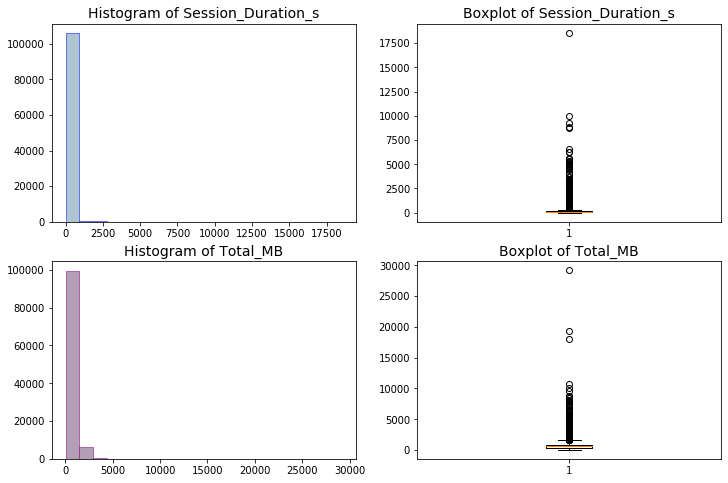

In [27]:
#plot before removing outliers
plot_univariate(user,'Session_Duration_s','Total_MB')

In [28]:
columns = user.columns.to_list()
del columns[:2]
for i in columns:
    user[i] = np.where(user[i] > user[i].quantile(0.95), user[i].median(),user[i])

In [29]:
user.describe()

,MSISDN_Number,No_of_xDRsessions,Session_Duration_s,Total_MB,Social_Media_MB,Google_MB,Email_MB,Youtube_MB,Netflix_MB,Gaming_MB,Other_MB,Avg_RTT_ms,Avg_TCP_Bytes,Avg_Throughput_kbps
count,106577.000000,106577.000000,106577.000000,106577.000000,106577.000000,106577.000000,106577.000000,106577.000000,106577.000000,106577.000000,106577.000000,106577.000000,106577.000000,106577.000000
mean,45144684684.863426,1.284076,120.040410,614.931752,2.260780,9.689863,2.800362,28.094639,28.073448,531.960612,530.473767,31.849784,461103.121647,4426.926494
std,2893202940895.355957,0.535163,77.020107,332.403127,1.328535,5.013777,1.482579,13.889940,13.941130,311.629503,312.083840,22.038213,731605.080907,7439.093058
min,33601001722.000000,1.000000,7.142000,33.249009,0.001563,0.040330,0.018176,0.078903,0.184569,0.306358,0.149045,0.000000,48.500000,0.000000
25%,33650885114.000000,1.000000,72.316000,358.840686,1.212147,5.945538,1.675674,18.639324,18.572865,288.332617,285.873168,20.000000,291536.750000,46.000000
50%,33663665845.000000,1.000000,103.114000,618.397626,2.305817,9.592858,2.801703,26.821223,26.732021,542.867981,540.204321,25.000000,297802.000000,100.000000
75%,33683406087.000000,1.000000,163.957000,810.762352,3.117421,12.328002,3.625533,35.111863,35.102550,731.723933,729.394944,33.500000,297802.000000,6489.500000
max,882397108489451.000000,3.000000,370.730000,1603.633088,6.093532,24.810448,7.228503,71.039429,71.115529,1435.079649,1437.577431,146.500000,5656437.000000,30694.500000


In [30]:
user[['Netflix_MB', 'Gaming_MB', 'Other_MB']].describe()

,Netflix_MB,Gaming_MB,Other_MB
count,106577.000000,106577.000000,106577.000000
mean,28.073448,531.960612,530.473767
std,13.941130,311.629503,312.083840
min,0.184569,0.306358,0.149045
25%,18.572865,288.332617,285.873168
50%,26.732021,542.867981,540.204321
75%,35.102550,731.723933,729.394944
max,71.115529,1435.079649,1437.577431


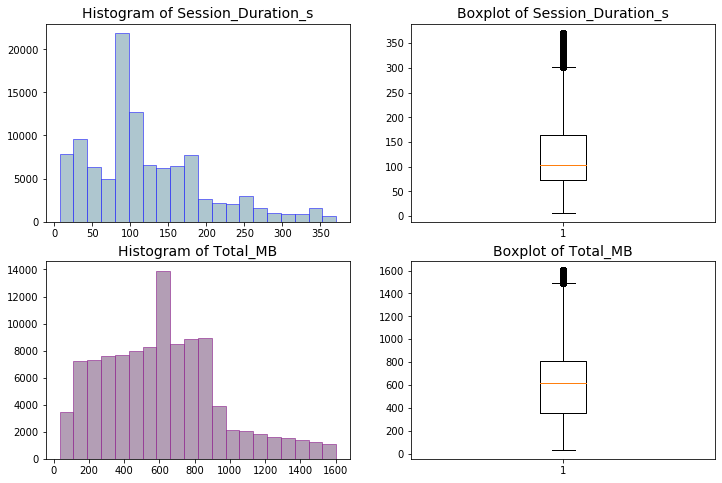

In [31]:
plot_univariate(user,'Session_Duration_s','Total_MB')

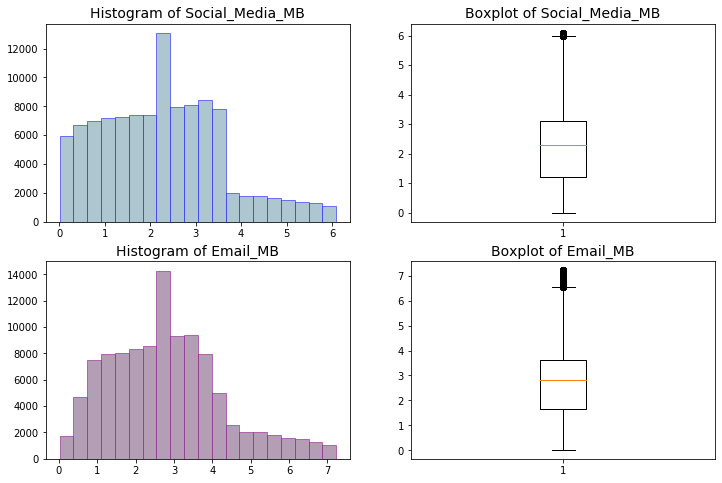

In [32]:
plot_univariate(user,'Social_Media_MB','Email_MB',)

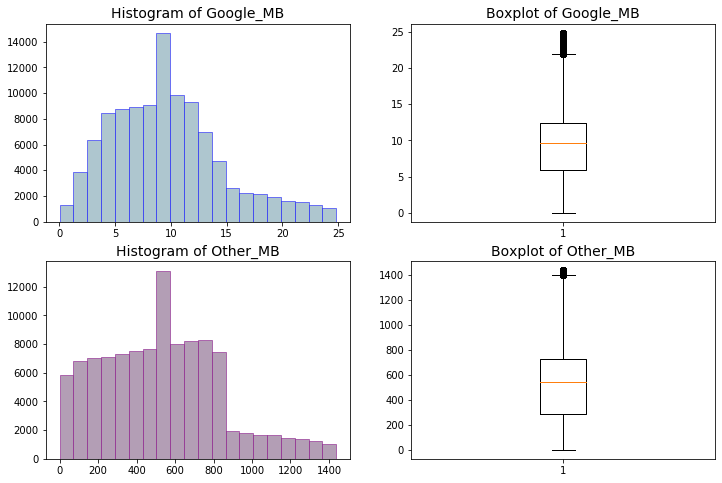

In [33]:
plot_univariate(user,'Google_MB','Other_MB',)

**Bivariate Analysis**

In [34]:
def plot_bivariate(df,col1,col2,col3,col4):
    fig,ax = plt.subplots(2,2,figsize=(12,8),sharey=True)
    
    ax1=plt.subplot(221)
    ax1.scatter(df[col1],df['Total_MB'],c='#AEC6CF',edgecolor='#AEC6CF',linewidth=1,alpha=0.8)
    ax1.title.set_text(f'Scatter plot of {col1} against Total_MB')
    
    ax2=plt.subplot(222)
    ax2.scatter(df[col2],df['Total_MB'],c='#AEC6CF',edgecolor='#AEC6CF',linewidth=1,alpha=0.8)
    ax2.title.set_text(f'Scatter plot of {col2} against Total_MB')
    
    ax3=plt.subplot(223)
    ax3.scatter(df[col3],df['Total_MB'],c='#AEC6CF',edgecolor='#AEC6CF',linewidth=1,alpha=0.8)
    ax3.title.set_text(f'Scatter plot of {col3} against Total_MB')
    
    ax4=plt.subplot(224)
    ax4.scatter(df[col4],df['Total_MB'],c='#AEC6CF',edgecolor='#AEC6CF',linewidth=1,alpha=0.8)
    ax4.title.set_text(f'Scatter plot of {col4} against Total_MB')
    plt.show()

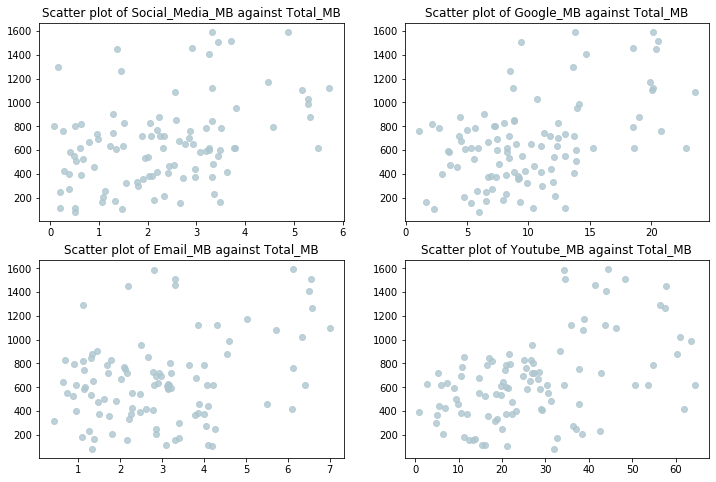

In [35]:
plot_bivariate(user.head(100),'Social_Media_MB','Google_MB','Email_MB', 'Youtube_MB')

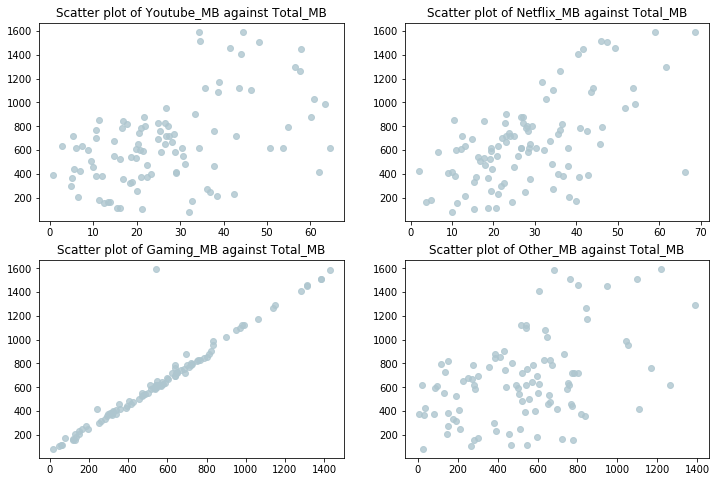

In [36]:
plot_bivariate(user.head(100),'Youtube_MB', 'Netflix_MB','Gaming_MB', 'Other_MB')

**Variable transformations**

In [37]:
user['DecileRank']= pd.qcut(user['Session_Duration_s'],q = 5, labels = False)
user.sample(5)

,MSISDN_Number,Handset_Type,No_of_xDRsessions,Session_Duration_s,Total_MB,Social_Media_MB,Google_MB,Email_MB,Youtube_MB,Netflix_MB,Gaming_MB,Other_MB,Avg_RTT_ms,Avg_TCP_Bytes,Avg_Throughput_kbps,DecileRank
82791,33689251036.000000,Samsung Galaxy S6 (Sm-G920X),1.000000,159.061000,181.605988,0.734537,9.682434,1.039946,34.871618,21.100731,103.598845,672.820253,15.000000,297802.000000,38.500000,3
28914,33658022151.000000,Apple iPhone 7 Plus (A1661),1.000000,86.399000,121.063254,3.076136,5.910550,2.102493,24.176854,24.655452,55.167740,320.559111,17.500000,50752.000000,100.000000,1
41165,33660726627.000000,Apple iPhone Se (A1723),1.000000,144.979000,823.140447,1.131609,4.765155,3.332077,19.493066,19.253566,775.051139,2.857500,14.500000,297802.000000,57.500000,3
47382,33662217231.000000,Huawei B528S-23A,1.000000,86.399000,199.416341,3.106838,10.343155,3.418214,39.343802,31.393935,97.327735,119.812168,49.500000,3067337.500000,8125.500000,1
28870,33658011858.000000,Apple iPhone 6 (A1586),1.000000,114.746000,370.097770,3.300994,2.621952,2.294167,16.107335,6.213106,338.042587,718.048421,23.500000,297802.000000,48.000000,2


In [38]:
user.groupby('DecileRank')['Total_MB'].sum()

DecileRank
0   11450357.681489
1   12305656.268152
2   12661416.425716
3   12955375.876996
4   16164775.058068
Name: Total_MB, dtype: float64

**Correlation Analysis**

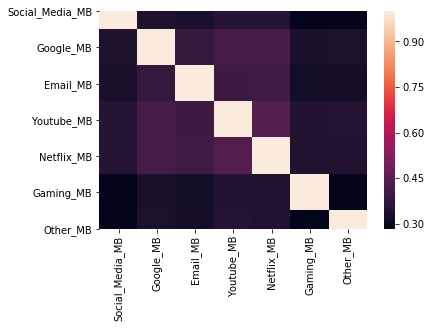

In [88]:
dataset=user[['Social_Media_MB', 'Google_MB', 'Email_MB','Youtube_MB', 'Netflix_MB', 'Gaming_MB', 'Other_MB']]
corr = dataset.corr()
sns.heatmap(corr)

**Principal Component Analysis**

In [40]:
from sklearn.preprocessing import StandardScaler
columns = ['Social_Media_MB', 'Google_MB', 'Email_MB', 'Youtube_MB','Netflix_MB', 'Gaming_MB', 'Other_MB']
dataset[columns]=StandardScaler().fit_transform(dataset[columns])
dataset.head()

,Social_Media_MB,Google_MB,Email_MB,Youtube_MB,Netflix_MB,Gaming_MB,Other_MB
0,-0.021561,-1.057263,-0.990846,-0.465814,-0.064017,0.900105,-0.461105
1,0.300923,-0.868611,0.342256,-1.127614,-1.208780,-1.322765,-0.797109
2,0.703668,-1.245920,0.273186,-0.486762,-0.625458,0.022036,-0.092220
3,-1.490736,-0.002268,-0.347836,-1.520339,-1.874416,-0.451931,-1.586742
4,0.490589,1.757117,0.340697,0.967493,1.515542,2.512088,0.879033


In [41]:
from sklearn.decomposition import PCA

pca = PCA()
transform=pca.fit_transform(dataset)
dataset_transform=pd.DataFrame(transform,columns = ['Social_Media_Bytes', 'Google_Bytes', 'Email_Bytes', 'Youtube_Bytes','Netflix_Bytes', 'Gaming_Bytes', 'Other_Bytes'])
dataset_transform.head()

,Social_Media_Bytes,Google_Bytes,Email_Bytes,Youtube_Bytes,Netflix_Bytes,Gaming_Bytes,Other_Bytes
0,-0.868211,1.049901,0.131149,-0.996884,-0.086898,-0.605744,-0.319995
1,-1.790676,-0.630518,-1.049063,-0.038919,1.044380,0.520183,0.111754
2,-0.613015,-0.015459,-0.512952,-0.916453,1.105469,-0.214158,0.110739
3,-2.751544,0.797584,0.094625,0.735525,0.202168,1.412059,0.313492
4,3.183436,1.377972,0.807179,-0.276337,-0.864465,0.281019,-0.416136


<h2>Task 2 - User Engagement analysis</h2>

Tracking the user’s engagement using the following engagement metrics: 
* sessions frequency 
* the duration of the session 
* the sessions total traffic (download and upload (bytes))

The **user** dataframe had already aggregated the aforementioned metrics

**Aggregate the above metrics per customer id (MSISDN) and report the top 10 customers per engagement metric** 

In [42]:
def sort_metrics(data,col1,col2):
    df=data[[col1,col2]]
    dataf=df.sort_values(by=col1,ascending=False).head(10)
    return dataf

In [43]:
sort_metrics(user,'No_of_xDRsessions','MSISDN_Number')

,No_of_xDRsessions,MSISDN_Number
86972,3.000000,33699012126.000000
58534,3.000000,33665084791.000000
11069,3.000000,33622438219.000000
103669,3.000000,33781321921.000000
69550,3.000000,33668631014.000000
11066,3.000000,33622433946.000000
33472,3.000000,33658971333.000000
13780,3.000000,33626784594.000000
58560,3.000000,33665092145.000000
13782,3.000000,33626789617.000000


In [44]:
sort_metrics(user,'Session_Duration_s','MSISDN_Number')

,Session_Duration_s,MSISDN_Number
70629,370.730000,33669020500.000000
34468,370.687000,33659180623.000000
93301,370.667000,33760824000.000000
63522,370.656000,33666680114.000000
65112,370.558000,33667204202.000000
99820,370.496000,33763600149.000000
49520,370.479000,33662705423.000000
41816,370.424000,33660880023.000000
21985,370.386000,33647930614.000000
104435,370.313000,33782406274.000000


In [45]:
sort_metrics(user,'Total_MB','MSISDN_Number')

,Total_MB,MSISDN_Number
3150,1603.633088,33609736461.000000
86222,1603.596892,33698786968.000000
51010,1603.506367,33663076315.000000
78278,1603.475888,33680109650.000000
64917,1603.332027,33667137860.000000
91569,1603.254860,33760089388.000000
70048,1603.193659,33668811505.000000
60623,1603.177432,33665646010.000000
95513,1602.907546,33761616097.000000
93002,1602.880939,33760679881.000000


In [46]:
user.columns

Index(['MSISDN_Number', 'Handset_Type', 'No_of_xDRsessions',
       'Session_Duration_s', 'Total_MB', 'Social_Media_MB', 'Google_MB',
       'Email_MB', 'Youtube_MB', 'Netflix_MB', 'Gaming_MB', 'Other_MB',
       'Avg_RTT_ms', 'Avg_TCP_Bytes', 'Avg_Throughput_kbps', 'DecileRank'],
      dtype='object')

**K-means clustering, to classify customers in three groups of engagement.**
* Our engagement metrics have different variances i.e 0.535166, 76.961036 and 332.115321  respectively for variables 'No_of_xDRsessions', 'Session_Duration_s', 'Total_MB' 
* Therefore, we standardise each engagement metric before carrying out K-means
* We use unlabelled data for this so we drop the MSISDN_Number

In [47]:
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import KMeans
def kmeans_clusters(df,columns,n,title):
    kmeans=KMeans(n_clusters=n)
    data=df.copy()
    data[columns]=StandardScaler().fit_transform(data[columns])
    cluster=kmeans.fit_predict(data[columns])
    df[title]=cluster

In [48]:
columns = ['No_of_xDRsessions', 'Session_Duration_s', 'Total_MB']
kmeans_clusters(df,columns,3,'engagement_clusters')

In [49]:
engagement_metrics=df.groupby('engagement_clusters').agg({'No_of_xDRsessions':['min','mean','max','sum'],
                                      'Session_Duration_s':['min','mean','max','sum'],
                                      'Total_MB':['min','mean','max','sum']})
engagement_metrics

No_of_xDRsessions                     Session_Duration_s  \
                                  min     mean max    sum                min   
engagement_clusters                                                            
0                                   1 1.032380   2  82482           7.142000   
1                                   1 2.199906   4  51436          18.235000   
2                                   1 4.571948  56  15092          85.554000   

                                                             Total_MB  \
                          mean          max            sum        min   
engagement_clusters                                                     
0                   103.438081   877.385000 8264185.445002  33.249009   
1                   219.020172  1480.875000 5120910.639000 118.487293   
2                   683.403752 18553.754000 2255915.784000 370.420998   

                                                              
                           mean          max             sum  
engagement_clusters                                           
0                    495.312222   950.760661 39572969.977089  
1                   1131.610632  2545.438880 26458188.180060  
2                   2377.977752 29238.058308  7849704.558678

**Aggregate user total traffic per application and derive the top 10 most engaged users per application**

In [50]:
sort_metrics(user,'Social_Media_MB','MSISDN_Number')

,Social_Media_MB,MSISDN_Number
2589,6.093532,33608759124.000000
95130,6.093419,33761550947.000000
16534,6.093186,33632112345.000000
56207,6.093030,33664448147.000000
18133,6.091340,33635502253.000000
20544,6.091094,33644200306.000000
26465,6.090929,33650844842.000000
30988,6.090514,33658445631.000000
54019,6.088900,33663827556.000000
7907,6.088676,33617353960.000000


In [51]:
sort_metrics(user,'Google_MB','MSISDN_Number')

,Google_MB,MSISDN_Number
72399,24.810448,33669617844.000000
62813,24.807171,33666435536.000000
30266,24.806901,33658296162.000000
52273,24.806306,33663399992.000000
96493,24.805886,33761955819.000000
97200,24.804661,33762254898.000000
73705,24.804278,33671100975.000000
22736,24.804269,33649864899.000000
863,24.801084,33603474563.000000
56231,24.797287,33664456674.000000


In [52]:
sort_metrics(user,'Email_MB','MSISDN_Number')

,Email_MB,MSISDN_Number
62201,7.228503,33666208605.000000
4752,7.227083,33612236789.000000
79928,7.226681,33683397731.000000
104208,7.226556,33782075168.000000
90313,7.226304,33750851635.000000
83820,7.225517,33695946286.000000
20187,7.225382,33643243898.000000
9002,7.225352,33619156234.000000
59887,7.225288,33665437333.000000
97079,7.225203,33762205004.000000


In [53]:
sort_metrics(user,'Youtube_MB','MSISDN_Number')

,Youtube_MB,MSISDN_Number
36408,71.039429,33659611157.000000
101164,71.033597,33768282381.000000
72636,71.031739,33669702644.000000
53958,71.022705,33663808037.000000
8962,71.019605,33619085406.000000
93542,71.018765,33760906933.000000
35769,71.017536,33659462220.000000
44719,71.016750,33661604597.000000
14854,71.013175,33628694962.000000
56591,71.012741,33664557795.000000


In [54]:
sort_metrics(user,'Netflix_MB','MSISDN_Number')

,Netflix_MB,MSISDN_Number
476,71.115529,33602345442.000000
49225,71.112846,33662637378.000000
98777,71.111136,33763079240.000000
81555,71.110648,33686763462.000000
36951,71.101650,33659734833.000000
3826,71.099000,33610809090.000000
28906,71.098738,33658020413.000000
56358,71.098346,33664491112.000000
58496,71.096274,33665072640.000000
73349,71.096168,33670454843.000000


In [55]:
sort_metrics(user,'Gaming_MB','MSISDN_Number')

,Gaming_MB,MSISDN_Number
653,1435.079649,33603123670.000000
15361,1434.872624,33629647637.000000
4137,1434.832654,33611321478.000000
19744,1434.655744,33642030018.000000
32165,1434.554280,33658710802.000000
94334,1434.532284,33761236643.000000
41806,1434.445815,33660876096.000000
54439,1434.346606,33663939454.000000
56641,1434.320181,33664576620.000000
65446,1434.308412,33667316024.000000


In [56]:
sort_metrics(user,'Other_MB','MSISDN_Number')

,Other_MB,MSISDN_Number
2852,1437.577431,33609206159.000000
73346,1437.536151,33670450633.000000
72612,1437.487413,33669696433.000000
88221,1437.476230,33699403399.000000
62767,1437.417806,33666414456.000000
18678,1437.170292,33637622603.000000
47408,1437.074563,33662223028.000000
31719,1437.003947,33658615568.000000
51361,1436.929824,33663162181.000000
33101,1436.923048,33658894225.000000


**Plot the top 3 most used applications using appropriate charts.** 

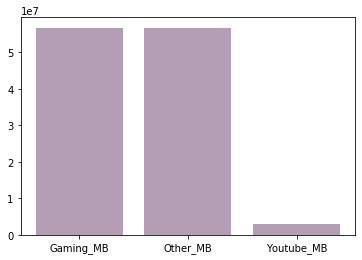

In [57]:
columns=['Social_Media_MB', 'Google_MB', 'Email_MB', 'Youtube_MB', 'Netflix_MB','Gaming_MB', 'Other_MB']
apps=user[columns].sum().sort_values(ascending=False).nlargest(3)

plt.bar(apps.index,apps,color='#b39eb5')
plt.show()

**Using k-means clustering algorithm, group users in k engagement clusters based on the engagement metrics using the elbow method**

We can choose 4 as the number of clusters, as that's the value of k at the "elbow"

Text(0.5, 1.0, 'Grouping users by K-Means Clustering(Elbow Method)')

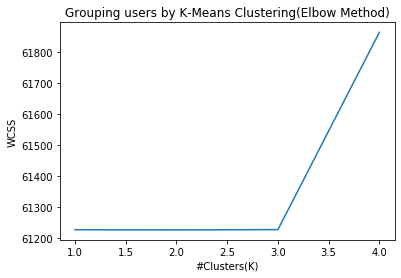

In [58]:
#Determining k
#wcss is the sum of squared distance between each point
customer=user[['No_of_xDRsessions', 'Session_Duration_s', 'Total_MB']]
columns = ['No_of_xDRsessions', 'Session_Duration_s', 'Total_MB']
customer[columns]=StandardScaler().fit_transform(customer[columns])

wcss_list=[]
for i in range(1,5):
    kmeans=KMeans()
    kmeans.fit(customer[columns])
    wcss_iter=kmeans.inertia_
    wcss_list.append(wcss_iter)

plt.plot(range(1,5),wcss_list)
plt.xlabel('#Clusters(K)')
plt.ylabel('WCSS')
plt.title('Grouping users by K-Means Clustering(Elbow Method)')

In [59]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3)
cluster=kmeans.fit_predict(customer[columns])
customer['cluster']=cluster
user_clusters=customer.groupby('cluster').agg({'No_of_xDRsessions':['min','mean','max','sum'],'Session_Duration_s':['min','mean','max','sum'],
                                      'Total_MB':['min','mean','max','sum']})

<h2>Task 3 - Experience Analytics</h2>

In [60]:
df.sample(5)

,MSISDN_Number,Handset_Type,No_of_xDRsessions,Session_Duration_s,Total_MB,Social_Media_MB,Google_MB,Email_MB,Youtube_MB,Netflix_MB,Gaming_MB,Other_MB,Avg_RTT_ms,Avg_TCP_Bytes,Avg_Throughput_kbps,engagement_clusters
38437,33660092035.000000,Huawei B528S-23A,4,345.596000,1135.676827,4.318047,33.890893,7.837277,45.200789,92.251744,926.382465,1042.030272,95.250000,28845632.750000,44997.625000,1
15333,33629610808.000000,Huawei P10 Lite,1,158.362000,513.901147,2.317602,8.098657,1.127072,18.953673,13.274907,459.915692,182.140146,10.000000,297802.000000,43.000000,0
67336,33667918473.000000,undefined,1,31.016000,166.625994,1.258979,6.468109,1.851429,12.935657,11.665517,120.249880,209.783577,24.000000,6441.500000,19000.000000,0
89164,33699689965.000000,Samsung Galaxy J5 (Sm-J510X),1,21.131000,517.874360,3.534207,10.902713,0.725448,28.786913,29.555029,435.851352,415.946802,27.000000,2185.500000,1562.500000,0
100335,33763932919.000000,Zte Mf259,1,291.889000,405.143001,0.031921,5.996933,1.367149,31.835383,37.324342,326.597732,170.908041,19.500000,895.500000,100.000000,0


In [61]:
#Confirming that there are no outliers
df.isnull().any()

MSISDN_Number          False
Handset_Type           False
No_of_xDRsessions      False
Session_Duration_s     False
Total_MB               False
Social_Media_MB        False
Google_MB              False
Email_MB               False
Youtube_MB             False
Netflix_MB             False
Gaming_MB              False
Other_MB               False
Avg_RTT_ms             False
Avg_TCP_Bytes          False
Avg_Throughput_kbps    False
engagement_clusters    False
dtype: bool

**Aggregate, per customer, the following information**
* Average TCP retransmission
* Average RTT
* Handset type
* Average throughput

In [62]:
experience=frame.copy()
experience=experience.groupby(['MSISDN_Number','Handset_Type']).agg({'Avg_RTT_ms':'mean','Avg_TCP_Bytes':'mean','Avg_Throughput_kbps':'mean'}).reset_index()
experience.sample(5)

,MSISDN_Number,Handset_Type,Avg_RTT_ms,Avg_TCP_Bytes,Avg_Throughput_kbps
67367,33667928487.000000,Apple iPhone 6S Plus (A1687),53.000000,1908662.000000,9664.500000
78143,33679825746.000000,undefined,25.000000,297802.000000,63.500000
52027,33663333826.000000,Samsung Galaxy A5 Sm-A520F,94.750000,32150610.750000,29500.000000
57643,33664843999.000000,Apple iPhone 5S (A1457),19.000000,297802.000000,335.000000
23750,33650213233.000000,Apple iPhone 4 (A1332),587.000000,297802.000000,2109.000000


**Compute & list 10 of the top, bottom and most frequent:**
* TCP values in the dataset. 
* RTT values in the dataset.
* Throughput values in the dataset.

In [63]:
def sort_values(data,col1,asc):
    df=data[[col1]]
    dataf=df.sort_values(by=col1,ascending=asc).head(10)
    return dataf

Top 10s

In [64]:
sort_values(experience,'Avg_RTT_ms',False)

,Avg_RTT_ms
47809,48462.000000
80054,27424.000000
41792,16167.500000
93608,13639.000000
1702,13150.000000
74075,12857.500000
104060,12694.000000
105480,12369.000000
85473,11505.250000
15348,10490.000000


In [65]:
sort_values(experience,'Avg_TCP_Bytes',False)

,Avg_TCP_Bytes
85575,2150738719.500000
32144,2144060430.000000
57919,2134323675.000000
31813,2127329821.500000
61931,2105628909.500000
69930,2083297486.500000
43471,2068968868.500000
48165,2058902486.500000
63986,1984060298.000000
97963,1893435466.500000


In [66]:
sort_values(experience,'Avg_Throughput_kbps',False)

,Avg_Throughput_kbps
37697,141965.500000
49418,132862.000000
60647,132588.250000
52639,127475.000000
14503,119491.000000
10311,117682.500000
104430,115491.000000
27609,114151.500000
92143,113667.000000
98032,113252.500000


Bottom 10s

In [67]:
sort_values(experience,'Avg_RTT_ms',True)

,Avg_RTT_ms
28764,0.000000
44585,0.000000
38921,1.000000
83189,2.000000
35899,2.500000
69514,3.000000
21885,4.000000
3862,4.500000
74269,4.500000
17791,5.000000


In [68]:
sort_values(experience,'Avg_TCP_Bytes',True)

,Avg_TCP_Bytes
23370,48.500000
6327,64.000000
96731,64.500000
13488,67.000000
2163,71.500000
25753,88.000000
101943,88.000000
105503,88.500000
77913,89.500000
89176,91.000000


In [69]:
sort_values(experience,'Avg_Throughput_kbps',True)

,Avg_Throughput_kbps
101784,0.000000
80078,0.000000
18954,0.000000
9415,0.000000
94503,0.000000
86515,0.000000
42645,0.000000
86715,0.000000
41979,0.000000
59432,0.000000


Most frequently occurring

In [70]:
def val_counts(data,col):
    df=data[[col]]
    dataf=df.value_counts().head(10)
    return dataf

In [71]:
val_counts(experience,'Avg_RTT_ms')

Avg_RTT_ms
25.000000     19546
14.500000      2949
19.500000      2413
19.000000      1660
20.000000      1642
15.000000      1577
14.000000      1457
24.500000      1389
20.500000      1263
15.500000      1190
dtype: int64

In [72]:
val_counts(experience,'Avg_TCP_Bytes')

Avg_TCP_Bytes
297802.000000    55983
287956.250000      367
287974.250000      164
11157.750000       144
292879.125000       82
287968.250000       81
11822.750000        76
10538.750000        76
10511.750000        70
288639.250000       65
dtype: int64

In [73]:
val_counts(experience,'Avg_Throughput_kbps')

Avg_Throughput_kbps
7.500000               2874
31.500000              2139
48.500000              1095
45.000000              1063
49.000000              1025
48.000000               938
49.500000               918
44.500000               881
45.500000               864
47.500000               856
dtype: int64

In [74]:
handset=experience.groupby('Handset_Type').agg({'Avg_Throughput_kbps':'mean','Avg_TCP_Bytes':'mean'}).reset_index()
handset

,Handset_Type,Avg_Throughput_kbps,Avg_TCP_Bytes
0,A-Link Telecom I. Cubot A5,11755.000000,297802.000000
1,A-Link Telecom I. Cubot Note Plus,3349.500000,308106.500000
2,A-Link Telecom I. Cubot Note S,4468.500000,20705865.500000
3,A-Link Telecom I. Cubot Nova,28108.500000,68585.000000
4,A-Link Telecom I. Cubot Power,34734.000000,4020.500000
...,...,...,...
1388,Zte Zte Blade C2 Smartphone Android By Sfr Sta...,29.000000,154812.375000
1389,Zyxel Communicat. Lte7460,30978.000000,20638273.000000
1390,Zyxel Communicat. Sbg3600,48675.500000,26743469.000000
1391,Zyxel Communicat. Zyxel Wah7706,1086.500000,10550.750000


**The distribution of the average throughput  per handset type**

In [75]:
def sort_handset(data,col1,col2,n):
    handsets=data.sort_values(by=col1,ascending=False)

    #plot
    plt.figure(figsize=(12,6))
    ax=sns.barplot(handsets[col2][:n],handsets[col1][:n],palette='PuBuGn',dodge=False)
    ax.set_xticklabels(handsets[col2][:n],rotation=80)
    plt.title(f'Distribution of the top {n} {col1} per {col2}')
    plt.show()

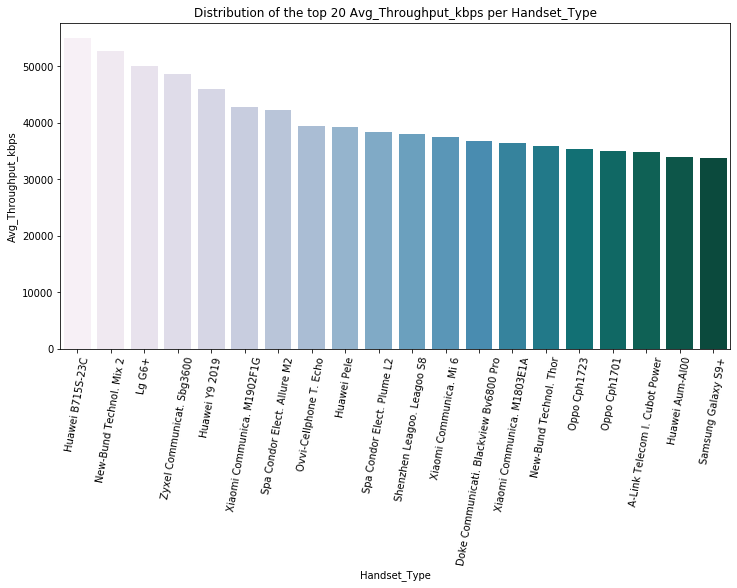

In [76]:
sort_handset(handset,'Avg_Throughput_kbps','Handset_Type',20)

**The distribution of the average TCP retransmission per handset type**

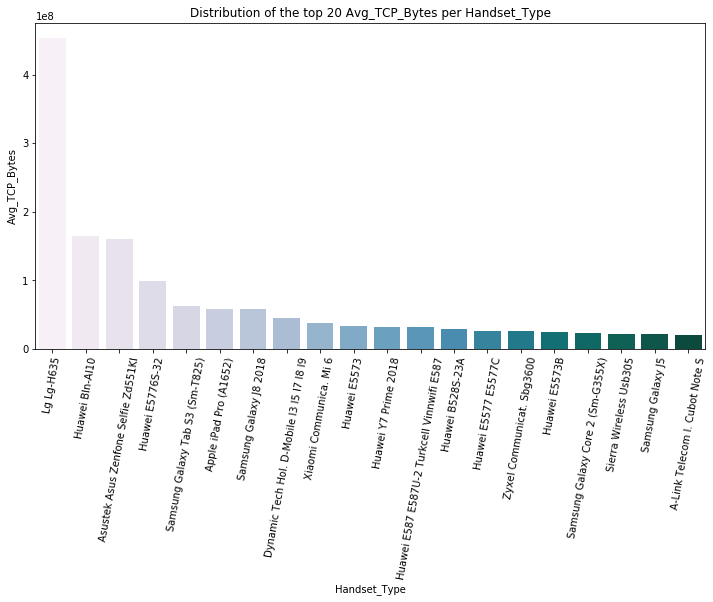

In [77]:
sort_handset(handset,'Avg_TCP_Bytes','Handset_Type',20)

**Using the experience metrics above, perform a k-means clustering (where k = 3)**

In [78]:
#call the k-means function we created
columns=['Avg_RTT_ms','Avg_Throughput_kbps', 'Avg_TCP_Bytes']
kmeans_clusters(df,columns,3,'experience_clusters')

In [79]:
experience_metrics=df.groupby('experience_clusters').agg({'Avg_RTT_ms':'mean','Avg_Throughput_kbps':'mean','Avg_TCP_Bytes':'mean'})
experience_metrics

,Avg_RTT_ms,Avg_Throughput_kbps,Avg_TCP_Bytes
experience_clusters,,,
0,60.220814,2156.522301,789893.212004
1,72.256869,35976.375909,1102624992.518636
2,51.031418,27521.095384,9361095.463984


In [80]:
engagement_metrics

No_of_xDRsessions                     Session_Duration_s  \
                                  min     mean max    sum                min   
engagement_clusters                                                            
0                                   1 1.032380   2  82482           7.142000   
1                                   1 2.199906   4  51436          18.235000   
2                                   1 4.571948  56  15092          85.554000   

                                                             Total_MB  \
                          mean          max            sum        min   
engagement_clusters                                                     
0                   103.438081   877.385000 8264185.445002  33.249009   
1                   219.020172  1480.875000 5120910.639000 118.487293   
2                   683.403752 18553.754000 2255915.784000 370.420998   

                                                              
                           mean          max             sum  
engagement_clusters                                           
0                    495.312222   950.760661 39572969.977089  
1                   1131.610632  2545.438880 26458188.180060  
2                   2377.977752 29238.058308  7849704.558678

<h2>Task 4 - Satisfaction Analysis</h2>

Calculate:
* engagement score to each user. Consider the engagement score as the Euclidean distance between the user data point & the less engaged cluster (use the first clustering for this) 
* experience score to each user. Consider the experience score as the Euclidean distance between the user data point & the worst experience’s cluster. 

In [81]:
df.sample()

,MSISDN_Number,Handset_Type,No_of_xDRsessions,Session_Duration_s,Total_MB,Social_Media_MB,Google_MB,Email_MB,Youtube_MB,Netflix_MB,Gaming_MB,Other_MB,Avg_RTT_ms,Avg_TCP_Bytes,Avg_Throughput_kbps,engagement_clusters,experience_clusters
19050,33638677519.000000,Apple iPhone 6 (A1586),1,94.649000,508.776215,2.203993,8.923623,2.134387,25.380747,12.665675,455.101859,832.975060,19.500000,297802.000000,43.000000,0,0


In [82]:
engagement_metrics

No_of_xDRsessions                     Session_Duration_s  \
                                  min     mean max    sum                min   
engagement_clusters                                                            
0                                   1 1.032380   2  82482           7.142000   
1                                   1 2.199906   4  51436          18.235000   
2                                   1 4.571948  56  15092          85.554000   

                                                             Total_MB  \
                          mean          max            sum        min   
engagement_clusters                                                     
0                   103.438081   877.385000 8264185.445002  33.249009   
1                   219.020172  1480.875000 5120910.639000 118.487293   
2                   683.403752 18553.754000 2255915.784000 370.420998   

                                                              
                           mean          max             sum  
engagement_clusters                                           
0                    495.312222   950.760661 39572969.977089  
1                   1131.610632  2545.438880 26458188.180060  
2                   2377.977752 29238.058308  7849704.558678

In [83]:
experience_metrics

,Avg_RTT_ms,Avg_Throughput_kbps,Avg_TCP_Bytes
experience_clusters,,,
0,60.220814,2156.522301,789893.212004
1,72.256869,35976.375909,1102624992.518636
2,51.031418,27521.095384,9361095.463984


In [84]:
df['satisfaction_score']= avg_col(df,'engagement_clusters','experience_clusters')
df.sample(10)

,MSISDN_Number,Handset_Type,No_of_xDRsessions,Session_Duration_s,Total_MB,Social_Media_MB,Google_MB,Email_MB,Youtube_MB,Netflix_MB,Gaming_MB,Other_MB,Avg_RTT_ms,Avg_TCP_Bytes,Avg_Throughput_kbps,engagement_clusters,experience_clusters,satisfaction_score
26302,33650809363.000000,Samsung Galaxy A5 Sm-A520F,5,1049.847000,2306.042683,11.094230,21.744638,14.358274,137.919968,145.274823,1921.659943,1628.193304,19.800000,208084.050000,51068.500000,2,2,2.000000
77477,33678484196.000000,Apple iPhone 7 Plus (A1784),2,264.075000,1032.720233,1.568310,12.433480,3.447414,54.170942,43.313138,895.356157,1111.393373,14.000000,297802.000000,41.000000,1,0,0.500000
105866,33786326995.000000,Apple iPhone 6 (A1586),2,152.040000,630.735054,3.319343,9.283393,1.174698,47.313760,39.720776,513.261046,774.367878,19.000000,297802.000000,48.250000,1,0,0.500000
78879,33681308373.000000,Huawei P20 Pro,1,164.442000,244.001764,0.244312,7.422268,2.471438,31.706958,6.218262,189.958411,782.699405,32.000000,297802.000000,56.500000,0,0,0.000000
38951,33660208775.000000,Samsung Galaxy A6 Sm-A600Fn Ds,1,33.959000,752.015617,2.075135,6.712351,2.611481,26.151339,25.959165,678.093745,775.766956,29.500000,10515.750000,219.500000,0,0,0.000000
41813,33660878941.000000,Apple iPhone 7 (A1778),2,61.261000,935.700840,2.156514,13.932907,2.983648,27.961411,57.328511,808.769356,795.943918,37.000000,460713.000000,8064.250000,1,0,0.500000
57854,33664893064.000000,Samsung Galaxy A5 Sm-A520F,1,156.590000,541.468647,0.700622,13.857946,2.450607,36.969104,6.322457,478.478268,136.497196,25.000000,297802.000000,31.500000,0,0,0.000000
65557,33667348068.000000,Huawei P20 Lite Huawei Nova 3E,1,178.795000,498.361738,0.365700,2.472644,1.076157,19.914454,26.266120,435.999780,305.733618,504.000000,297802.000000,50.000000,0,0,0.000000
11147,33622571312.000000,undefined,2,426.998000,449.777641,3.437446,18.201995,2.382440,32.993221,46.322052,339.624781,774.790423,25.000000,297802.000000,63.750000,1,0,0.500000
83307,33695186565.000000,Huawei P20 Lite Huawei Nova 3E,1,86.399000,411.404845,2.089404,9.194252,0.242285,23.406176,24.183385,348.453344,521.755550,61.000000,10013983.000000,2425.000000,0,0,0.000000


In [85]:
#satisfaction score ranges from 0-3
sort_metrics(df,'satisfaction_score','MSISDN_Number')

,satisfaction_score,MSISDN_Number
96900,2.000000,33762167566.000000
37805,2.000000,33659931888.000000
94312,2.000000,33761226879.000000
52539,2.000000,33663463337.000000
84234,2.000000,33698161218.000000
94321,2.000000,33761231090.000000
44158,2.000000,33661469891.000000
94334,2.000000,33761236643.000000
72986,2.000000,33669946573.000000
52490,2.000000,33663450956.000000


**Build a regression model of your choice to predict the satisfaction score of a
customer**

Multivariate Linear Regression Model because we have multiple explanatory variables

In [86]:
df=pd.get_dummies(data=df,columns=['Handset_Type'])
df.head()

,MSISDN_Number,No_of_xDRsessions,Session_Duration_s,Total_MB,Social_Media_MB,Google_MB,Email_MB,Youtube_MB,Netflix_MB,Gaming_MB,Other_MB,Avg_RTT_ms,Avg_TCP_Bytes,Avg_Throughput_kbps,engagement_clusters,experience_clusters,satisfaction_score,Handset_Type_A-Link Telecom I. Cubot A5,Handset_Type_A-Link Telecom I. Cubot Note Plus,Handset_Type_A-Link Telecom I. Cubot Note S,Handset_Type_A-Link Telecom I. Cubot Nova,Handset_Type_A-Link Telecom I. Cubot Power,Handset_Type_A-Link Telecom I. Cubot R9,Handset_Type_A-Link Telecom I. Cubot X18 Plus,Handset_Type_Acer Liquid M220,Handset_Type_Acer Liquid Z220,Handset_Type_Acer Liquid Z530,Handset_Type_Acer Liquid Z630,Handset_Type_Acer Liquid Zest 4G,Handset_Type_Acer Liquid Zest Plus,Handset_Type_Acer M310,Handset_Type_Acer V370 Acer V370 Liquid E2 Duo,Handset_Type_Acer Zx Z130,Handset_Type_Adar Stanley Mobile S231,Handset_Type_Alif Communicati. Pulian Cm84,Handset_Type_Apple iPad (A1823),Handset_Type_Apple iPad (A1954),Handset_Type_Apple iPad 2 (A1396),Handset_Type_Apple iPad 3 (A1430),Handset_Type_Apple iPad 4 (A1460),Handset_Type_Apple iPad Air (A1475),Handset_Type_Apple iPad Air 2 (A1567),Handset_Type_Apple iPad Mini (A1455),Handset_Type_Apple iPad Mini (A1490),Handset_Type_Apple iPad Mini (A1600),Handset_Type_Apple iPad Mini 4 (A1550),Handset_Type_Apple iPad Pro (A1652),Handset_Type_Apple iPad Pro 10.5 (A1709),Handset_Type_Apple iPad Pro 12.9 (A1671),Handset_Type_Apple iPad Pro 9.7 (A1674),Handset_Type_Apple iPhone 3Gs (A1303),Handset_Type_Apple iPhone 4 (A1332),Handset_Type_Apple iPhone 4S (A1387),Handset_Type_Apple iPhone 4S (A1431),Handset_Type_Apple iPhone 5 (A1428) A1428S,Handset_Type_Apple iPhone 5 (A1429),Handset_Type_Apple iPhone 5C (A1456),Handset_Type_Apple iPhone 5C (A1507),Handset_Type_Apple iPhone 5C (A1529),Handset_Type_Apple iPhone 5C (A1532),Handset_Type_Apple iPhone 5S (A1453),Handset_Type_Apple iPhone 5S (A1457),Handset_Type_Apple iPhone 5S (A1528),Handset_Type_Apple iPhone 5S (A1530),Handset_Type_Apple iPhone 5S (A1533),Handset_Type_Apple iPhone 6 (A1549),Handset_Type_Apple iPhone 6 (A1586),Handset_Type_Apple iPhone 6 Plus (A1522),Handset_Type_Apple iPhone 6 Plus (A1524),Handset_Type_Apple iPhone 6S (A1633),Handset_Type_Apple iPhone 6S (A1688),Handset_Type_Apple iPhone 6S (A1700),Handset_Type_Apple iPhone 6S Plus (A1634),Handset_Type_Apple iPhone 6S Plus (A1687),Handset_Type_Apple iPhone 6S Plus (A1699),Handset_Type_Apple iPhone 7 (A1660),Handset_Type_Apple iPhone 7 (A1778),Handset_Type_Apple iPhone 7 (A1779),Handset_Type_Apple iPhone 7 (A1780),Handset_Type_Apple iPhone 7 Plus (A1661),Handset_Type_Apple iPhone 7 Plus (A1784),Handset_Type_Apple iPhone 7 Plus (A1785),Handset_Type_Apple iPhone 8 (A1863),Handset_Type_Apple iPhone 8 (A1905),Handset_Type_Apple iPhone 8 (A1906),Handset_Type_Apple iPhone 8 Plus (A1864),Handset_Type_Apple iPhone 8 Plus (A1897),Handset_Type_Apple iPhone 8 Plus (A1898),Handset_Type_Apple iPhone 8 Plus (A1899),Handset_Type_Apple iPhone Se (A1662),Handset_Type_Apple iPhone Se (A1723),Handset_Type_Apple iPhone X (A1865),Handset_Type_Apple iPhone X (A1901),Handset_Type_Apple iPhone X (A1902),Handset_Type_Apple iPhone Xr (A1984),Handset_Type_Apple iPhone Xr (A2105),Handset_Type_Apple iPhone Xr (A2106),Handset_Type_Apple iPhone Xr (A2108),Handset_Type_Apple iPhone Xs (A1920),Handset_Type_Apple iPhone Xs (A2097),Handset_Type_Apple iPhone Xs (A2098),Handset_Type_Apple iPhone Xs (A2100),Handset_Type_Apple iPhone Xs Max (A1921),Handset_Type_Apple iPhone Xs Max (A2101),Handset_Type_Apple iPhone Xs Max (A2104),Handset_Type_Archos Sa 50 Cesium,Handset_Type_Archos Sa 50 Platinum 4G,Handset_Type_Archos Sa 50 Saphir,Handset_Type_Archos Sa 50 Titanium 4G,Handset_Type_Archos Sa 50B Cobalt (Lite),Handset_Type_Archos Sa 50F Neon,Handset_Type_Archos Sa 55 Cobalt + Bush Spira B3 5.5,Handset_Type_Archos Sa 55 Diamond Selfie ( Lite),Handset_Type_Archos Sa 55 Helium (Ultra),Handset_Type_Archos Sa 55B Platinum,Handset_Type_Archos Sa Access 45 4G,Handset_Type_Archos Sa 

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X= df.drop(['satisfaction_score','MSISDN_Number'],axis=1)
y=df['satisfaction_score']
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.3,random_state=0)

regressor = LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression()